In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import pickle

/home/anonymous/miniconda3/envs/belka/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
merged_df = pd.read_parquet('training_small_fingers_set.parquet')

In [3]:
import swifter

# Step 3: Unpacking the Avalon data
def unpack_avalon(encoded_avalon):
    return pickle.loads(encoded_avalon)

# Apply the unpack function to the Avalon column
merged_df['maccs_unpacked'] = merged_df['maccs'].swifter.apply(unpack_avalon)

# Optionally, convert boolean lists into separate feature columns or handle as appropriate
# Example of expansion into separate columns if necessary
# This part depends on the exact structure and needs of your model training
avalon_features = pd.DataFrame(merged_df['maccs_unpacked'].tolist())
avalon_features.columns = ['RDK_feature_' + str(i) for i in tqdm(range(avalon_features.shape[1]))]
merged_df = pd.concat([merged_df, avalon_features.astype('int8')], axis=1).drop('maccs', axis=1)

train = merged_df[(merged_df['test_u']==False)&(merged_df['test1']==False)&(merged_df['test2']==False)]
test = merged_df[(merged_df['test_u']==True)]


100%|██████████| 167/167 [00:00<00:00, 1700118.37it/s]


In [4]:
# Step 4: Prepare the final DataFrame for XGBoost
# Assuming 'binds' is the label
X_train = train.drop(['binds','molecule_smiles','test_u','test1','test2','maccs_unpacked','ecfp','Avalon','RDKFingerprint', 'Torsion'], axis=1)  # features
y_train = train['binds']  # labels

X_test = test.drop(['binds','molecule_smiles','test_u','test1','test2','maccs_unpacked','ecfp','Avalon','RDKFingerprint', 'Torsion'], axis=1)  # features
y_test = test['binds']  # labels

In [5]:
# Assuming X_train is already defined and is a pandas DataFrame
total_memory_bytes = X_train.memory_usage(deep=True).sum()  # Calculate total memory usage in bytes
total_memory_gb = total_memory_bytes / (1024 ** 3)  # Convert bytes to gigabytes

print(f"The size of X_train in memory is approximately {total_memory_gb:.3f} GB")

The size of X_train in memory is approximately 0.320 GB


In [6]:
X_train

,molecular_size,protein_name_BRD4,protein_name_HSA,protein_name_sEH,RDK_feature_0,RDK_feature_1,RDK_feature_2,RDK_feature_3,RDK_feature_4,RDK_feature_5,...,RDK_feature_157,RDK_feature_158,RDK_feature_159,RDK_feature_160,RDK_feature_161,RDK_feature_162,RDK_feature_163,RDK_feature_164,RDK_feature_165,RDK_feature_166
2,72,0.0,0.0,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,63,1.0,0.0,0.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,71,0.0,0.0,1.0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
5,69,0.0,0.0,1.0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
6,78,1.0,0.0,0.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020475,61,0.0,1.0,0.0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2020477,58,0.0,1.0,0.0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
2020478,65,0.0,1.0,0.0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
2020479,73,0.0,0.0,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


[0]	train-auc:0.74540	train-map_micro:0.03974	test-auc:0.57120	test-map_micro:0.01537
[1]	train-auc:0.75924	train-map_micro:0.05539	test-auc:0.59414	test-map_micro:0.01961
[2]	train-auc:0.76281	train-map_micro:0.05556	test-auc:0.59714	test-map_micro:0.01954
[3]	train-auc:0.76322	train-map_micro:0.05702	test-auc:0.60434	test-map_micro:0.01971
[4]	train-auc:0.76919	train-map_micro:0.05801	test-auc:0.60601	test-map_micro:0.02007
[5]	train-auc:0.77029	train-map_micro:0.06041	test-auc:0.60092	test-map_micro:0.02008
[6]	train-auc:0.77020	train-map_micro:0.06014	test-auc:0.60026	test-map_micro:0.01995
[7]	train-auc:0.77330	train-map_micro:0.06123	test-auc:0.60255	test-map_micro:0.02100
[8]	train-auc:0.77430	train-map_micro:0.06218	test-auc:0.59737	test-map_micro:0.02118
[9]	train-auc:0.77514	train-map_micro:0.06201	test-auc:0.59935	test-map_micro:0.02101
[10]	train-auc:0.77996	train-map_micro:0.06455	test-auc:0.60484	test-map_micro:0.02166
[11]	train-auc:0.78288	train-map_micro:0.06406	test-a

/home/anonymous/miniconda3/envs/belka/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [09:30:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1713397827678/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


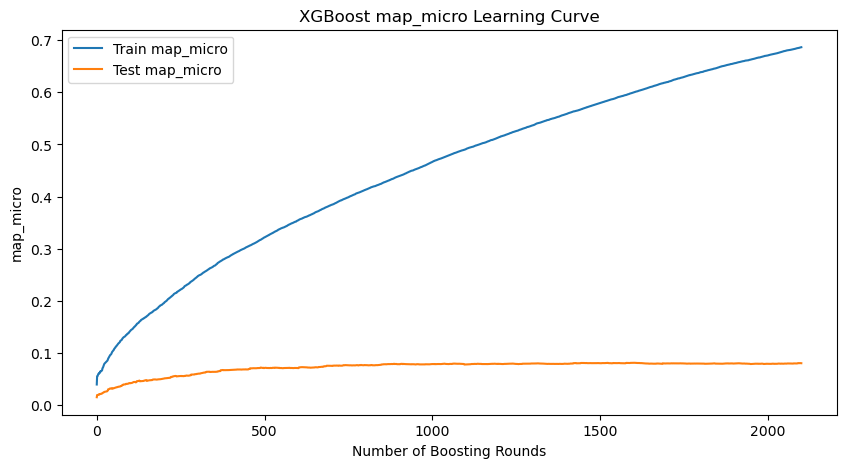

In [7]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
import multiprocessing
def map_micro(preds, dtrain):
    labels = dtrain.get_label()
    # Calculate the MAP score
    score = average_precision_score(labels, preds, average='micro')
    return 'map_micro', score

# Parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'device': 'cuda',
    'tree_method': 'hist',  # Utilize GPU for histogram construction
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_jobs': multiprocessing.cpu_count() // 2,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting a very large number for num_boost_round and using early stopping
num_boost_round = 1000000  # A large number, effectively "infinite"
early_stopping_rounds = 500  # Stops training if no improvement in 50 rounds
evals_result = {}
# Train model
model = xgb.train(params, dtrain, evals=[(dtrain, 'train'), (dtest, 'test')], 
                  num_boost_round=num_boost_round, early_stopping_rounds=early_stopping_rounds,
                  evals_result=evals_result, custom_metric=map_micro,
                  maximize=True)  # Since MAP is higher the better

# Best iteration and best score
best_iteration = model.best_iteration
best_score = model.best_score
print(f"Best iteration: {best_iteration}, Best AUCPR: {best_score}")

# Save the model
model.save_model('xgboost_model.bin')


# Plotting the learning curve for AUCPR
train_aucpr = evals_result['train']['map_micro']
test_aucpr = evals_result['test']['map_micro']
plt.figure(figsize=(10, 5))
plt.plot(train_aucpr, label='Train map_micro')
plt.plot(test_aucpr, label='Test map_micro')
plt.title('XGBoost map_micro Learning Curve')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('map_micro')
plt.legend()
plt.show()